In [86]:
from transformer_model import TransformerModel
import torch

In [130]:
filename1 = "/Users/juliushietala/junction_2020/junction-2020-gubbet-koodaa/speech_recognition/test_audio/test.mp3"
filename2 = "/Users/juliushietala/junction_2020/tensorflow-speech-recognition-challenge/train/audio/up/0a7c2a8d_nohash_0.wav"
waveform, sample_rate = torchaudio.load(filename1)

downsample_rate=16000

downsample_resample = torchaudio.transforms.Resample(
    sample_rate, downsample_rate, resampling_method='sinc_interpolation')

waveform = downsample_resample(waveform)
n_fft = 400.0
frame_length = n_fft / sample_rate * 1000.0
frame_shift = frame_length / 2.0
#hamming, hanning, povey (default), rectangular, blackman
params = {
    "channel": 0,
    "dither": 0.0,
    "window_type": "hanning",
    "frame_length": frame_length,
    "frame_shift": frame_shift,
    "remove_dc_offset": True,
    "round_to_power_of_two": True,
    "sample_frequency": sample_rate,
    "num_mel_bins": 24
}
fbank = torchaudio.compliance.kaldi.fbank(waveform, **params)

torch.Size([76, 24])


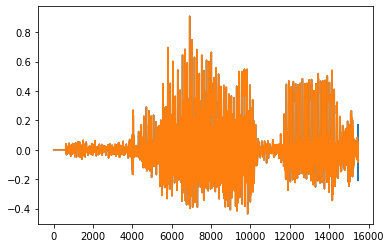

In [131]:
print(fbank.size())
plt.figure()
plt.plot(waveform.t().numpy()[:,:]);

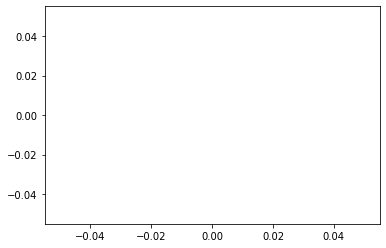

In [113]:
plt.figure()
split_form = waveform[:,30000:38000]
split_form.shape
plt.plot(split_form.numpy().T);

In [114]:
fbank = torchaudio.compliance.kaldi.fbank(split_form, **params)

AssertionError: choose a window size 400 that is [2, 0]

In [115]:
fbank.size()

torch.Size([79, 24])

In [101]:
#torchaudio.save('foo_save.wav', np_form, sample_rate) 

In [103]:
print(pred)
print(torch.argmax(pred))

tensor([[ 2.0890,  5.4309,  1.2932, -2.0529,  1.4956,  2.1633,  0.7760, -1.5124,
         -2.1189,  1.2231]], grad_fn=<AddmmBackward>)
tensor(1)


In [2]:
import pandas as pd
import os

df = pd.DataFrame(columns=['index', 'path', 'label'])
root = "/Users/juliushietala/junction_2020/tensorflow-speech-recognition-challenge/train/audio/"
ignore = ['_background_noise_', '.DS_Store' ]
desired_labels = ['up', 'down', 'left', 'right']
n = 0
labels = []
limit_data = False
for folder in os.listdir(root):
    if not folder in ignore:
        labels.append(folder)
        noise = 0
        for file in os.listdir(root+folder):
            df = df.append({'index': n, 'path': folder+"/"+file, 'label': folder}, ignore_index=True)
            n += 1
            if not folder in desired_labels and limit_data:
                print("added noise", folder, noise)
                noise +=1
            if noise > 100 and limit_data:
                noise = 0
                break
            


In [3]:
df.head(-1)

index                         path  label
0          0  right/988e2f9a_nohash_0.wav  right
1          1  right/1eddce1d_nohash_3.wav  right
2          2  right/93ec8b84_nohash_0.wav  right
3          3  right/6272b231_nohash_1.wav  right
4          4  right/439c84f4_nohash_1.wav  right
...      ...                          ...    ...
64715  64715   four/333784b7_nohash_1.wav   four
64716  64716   four/93f30cc4_nohash_1.wav   four
64717  64717   four/0c40e715_nohash_0.wav   four
64718  64718   four/238c112c_nohash_0.wav   four
64719  64719   four/173ae793_nohash_1.wav   four

[64720 rows x 3 columns]

In [4]:
df.to_csv("train_data.csv")